In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- Configuration ---
DATA_CSV_FILE = 'landmark_data_raw.csv'
LABEL_MAP_FILE = 'label_map.pkl'
TEST_SIZE = 0.2
RANDOM_STATE = 42

In [3]:
# --- Load Data using Pandas ---
try:
    df = pd.read_csv(DATA_CSV_FILE)
    print(f"Data loaded successfully from {DATA_CSV_FILE}")
    print(f"Original shape of loaded data: {df.shape}")
    # print(df.head())
except FileNotFoundError:
    print(f"Error: Data file '{DATA_CSV_FILE}' not found. Please run the modified Step 1 first.")
    exit()
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

Data loaded successfully from landmark_data_raw.csv
Original shape of loaded data: (23979, 43)


Data Loading

In [4]:
# Loading the Data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("landmark_data_raw.csv")

In [5]:
# Making sure the data is successfully loaded
df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21,label
0,0.558517,0.664594,0.476035,0.612301,0.431514,0.504851,0.427094,0.403794,0.424738,0.333614,0.474575,0.438848,0.481556,0.354485,0.494699,0.420453,0.501962,0.485891,0.524054,0.439127,0.533059,0.360523,0.536488,0.451925,0.534866,0.522985,0.566419,0.452654,0.575813,0.387260,0.570550,0.477297,0.565214,0.543041,0.609462,0.473731,0.617308,0.419359,0.610826,0.476475,0.604047,0.519803,A
1,0.558406,0.665888,0.474780,0.611804,0.431405,0.504263,0.427708,0.403785,0.424499,0.334199,0.473593,0.440002,0.481648,0.355482,0.494610,0.423589,0.501242,0.487882,0.522892,0.440755,0.533195,0.361806,0.536135,0.454124,0.533964,0.522522,0.565622,0.454374,0.576120,0.388559,0.570500,0.479223,0.564647,0.542832,0.608591,0.475543,0.617291,0.420749,0.610132,0.478566,0.602543,0.521680,A
2,0.540203,0.669698,0.462473,0.612505,0.422092,0.510399,0.420170,0.414968,0.416959,0.346924,0.462985,0.446954,0.471622,0.371956,0.482952,0.434373,0.488903,0.496805,0.509965,0.449998,0.519601,0.378325,0.522312,0.463601,0.521089,0.531330,0.551838,0.464465,0.561985,0.403782,0.555427,0.487516,0.548726,0.550178,0.593486,0.486580,0.599040,0.433174,0.590693,0.486300,0.583432,0.529451,A
3,0.572545,0.669638,0.492168,0.603944,0.453057,0.488946,0.454660,0.384672,0.456002,0.309761,0.499861,0.420465,0.512956,0.341844,0.520884,0.411657,0.523120,0.479511,0.551346,0.427032,0.564712,0.353747,0.562626,0.448366,0.557082,0.522857,0.595092,0.446885,0.608658,0.384764,0.597026,0.475863,0.586795,0.545455,0.637999,0.474349,0.647752,0.417047,0.636150,0.474738,0.625247,0.522832,A
4,0.566377,0.668518,0.489221,0.604879,0.449541,0.488097,0.449978,0.385729,0.451716,0.310707,0.496133,0.418548,0.508901,0.344010,0.516714,0.415929,0.519219,0.483613,0.546961,0.425365,0.559890,0.352877,0.557517,0.449461,0.552742,0.522394,0.590897,0.445622,0.603763,0.384939,0.591021,0.478724,0.580464,0.546039,0.633220,0.473766,0.640965,0.419342,0.627994,0.481106,0.616989,0.528065,A


Data Exploration

In [6]:
# Understanding the nature of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23979 entries, 0 to 23978
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      23979 non-null  float64
 1   y1      23979 non-null  float64
 2   x2      23979 non-null  float64
 3   y2      23979 non-null  float64
 4   x3      23979 non-null  float64
 5   y3      23979 non-null  float64
 6   x4      23979 non-null  float64
 7   y4      23979 non-null  float64
 8   x5      23979 non-null  float64
 9   y5      23979 non-null  float64
 10  x6      23979 non-null  float64
 11  y6      23979 non-null  float64
 12  x7      23979 non-null  float64
 13  y7      23979 non-null  float64
 14  x8      23979 non-null  float64
 15  y8      23979 non-null  float64
 16  x9      23979 non-null  float64
 17  y9      23979 non-null  float64
 18  x10     23979 non-null  float64
 19  y10     23979 non-null  float64
 20  x11     23979 non-null  float64
 21  y11     23979 non-null  float64
 22

In [7]:
df.describe()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
count,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000
mean,0.443320,0.704727,0.394597,0.641278,0.382730,0.547862,0.411054,0.481894,0.443230,0.446925,0.417908,0.456002,0.430894,0.380519,0.442066,0.381633,0.451486,0.384507,0.460479,0.465272,0.473054,0.391662,0.467527,0.411719,0.462795,0.416305,0.496848,0.490223,0.510443,0.428645,0.490816,0.472203,0.476437,0.499498,0.530035,0.525502,0.537982,0.472787,0.522277,0.491092,0.510395,0.503859
std,0.143098,0.112396,0.139456,0.102916,0.143021,0.083368,0.154073,0.080871,0.165442,0.100272,0.146290,0.059306,0.157837,0.071801,0.165267,0.099207,0.174257,0.138916,0.139208,0.058850,0.145991,0.087600,0.147337,0.115152,0.151358,0.152615,0.134225,0.066190,0.139619,0.093365,0.141543,0.106553,0.143929,0.129901,0.132739,0.076520,0.137903,0.093446,0.142463,0.105729,0.146154,0.125789
min,0.049468,0.239446,0.057489,0.274510,0.058628,0.184936,0.053869,0.159976,-0.004327,0.162511,0.088417,0.237399,0.079357,0.185999,0.094041,0.196129,0.091253,0.139515,0.143476,0.304846,0.137541,0.155044,0.132024,0.182274,0.088260,0.130201,0.195130,0.314206,0.190715,0.176589,0.143426,0.190510,0.094546,0.157530,0.236996,0.337015,0.223024,0.244286,0.148642,0.219019,0.104132,0.129460
25%,0.340219,0.677461,0.291681,0.606915,0.268973,0.497652,0.299873,0.424227,0.326247,0.367404,0.309316,0.413493,0.312432,0.336874,0.314828,0.305048,0.318098,0.261131,0.353714,0.422497,0.366706,0.336745,0.356827,0.304708,0.352573,0.265683,0.392376,0.441991,0.408284,0.363540,0.387164,0.393518,0.377504,0.421966,0.429662,0.471336,0.433812,0.404243,0.419518,0.413291,0.407393,0.415408
50%,0.443738,0.727113,0.389265,0.662178,0.370241,0.557505,0.396425,0.488803,0.428999,0.455201,0.410100,0.466744,0.421069,0.374453,0.430719,0.369488,0.436733,0.381968,0.452001,0.474498,0.462677,0.377692,0.457131,0.409507,0.452970,0.443518,0.488503,0.496818,0.501110,0.423450,0.477955,0.485638,0.466841,0.529353,0.523241,0.525652,0.531969,0.469476,0.515027,0.494423,0.504697,0.521240
75%,0.544111,0.775804,0.496684,0.709534,0.484563,0.606564,0.514200,0.547714,0.549240,0.518680,0.523793,0.501252,0.544421,0.411609,0.560449,0.438520,0.573017,0.478667,0.560587,0.504733,0.579910,0.435836,0.571143,0.506303,0.565754,0.542218,0.595678,0.531913,0.605631,0.475128,0.591589,0.547101,0.575821,0.595445,0.628825,0.573910,0.636444,0.531193,0.625436,0.569956,0.615913,0.602763
max,0.782485,0.882933,0.761069,0.832301,0.780892,0.713968,0.843277,0.687118,0.893908,0.771212,0.798518,0.620012,0.826910,0.677334,0.875970,0.776300,0.919939,0.860211,0.809712,0.673264,0.843874,0.667961,0.876656,0.717123,0.929386,0.776187,0.848032,0.737396,0.879847,0.710004,0.872992,0.721876,0.861605,0.787066,0.878217,0.804800,0.908068,0.767942,0.896601,0.761976,0.879601,0.779131


In [8]:
# Checking if the data contains nulls
df.isna().sum()

x1       0
y1       0
x2       0
y2       0
x3       0
y3       0
x4       0
y4       0
x5       0
y5       0
x6       0
y6       0
x7       0
y7       0
x8       0
y8       0
x9       0
y9       0
x10      0
y10      0
x11      0
y11      0
x12      0
y12      0
x13      0
y13      0
x14      0
y14      0
x15      0
y15      0
x16      0
y16      0
x17      0
y17      0
x18      0
y18      0
x19      0
y19      0
x20      0
y20      0
x21      0
y21      0
label    0
dtype: int64

In [9]:
# Checking if the data is balanced or not
df['label'].value_counts()

label
A    1000
M    1000
W    1000
V    1000
U    1000
T    1000
S    1000
R    1000
Q    1000
P    1000
B    1000
N    1000
L    1000
K    1000
I    1000
H    1000
G    1000
F    1000
E    1000
D    1000
C    1000
Y    1000
X     991
O     988
Name: count, dtype: int64

Data Visualization

C:\Users\Reez\AppData\Local\Temp\ipykernel_22564\3595195236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")


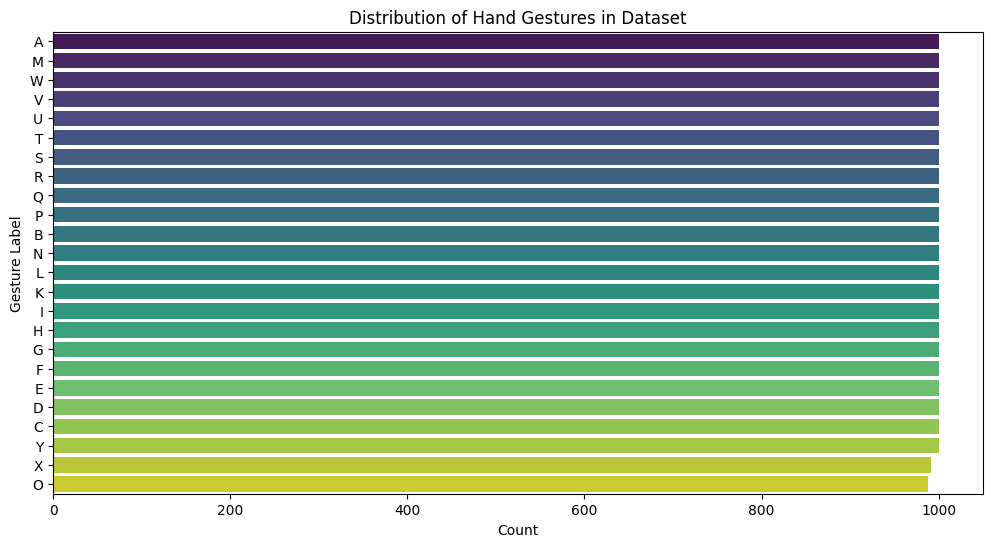

In [10]:
# Visualizing the count of each class
plt.figure(figsize=(12, 6))
sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Gesture Label")
plt.title("Distribution of Hand Gestures in Dataset")
plt.show()

In [11]:
# Visualizing the different classes
def plot_hand_gesture(df, sample_index):

    sample = df.iloc[sample_index]
    x_coords = [sample[f'x{i}'] for i in range(1, 22)]
    y_coords = [sample[f'y{i}'] for i in range(1, 22)]
    y_coords = np.max(y_coords) - np.array(y_coords)

    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8),  # Index finger
        (5, 9), (9, 10), (10, 11), (11, 12),  # Middle finger
        (9, 13), (13, 14), (14, 15), (15, 16),  # Ring finger
        (0, 17), (13, 17), (17, 18), (18, 19), (19, 20)  # Pinky finger
    ]

    plt.figure(figsize=(5, 5))
    plt.scatter(x_coords, y_coords, color='red', label="Keypoints")
    for connection in connections:
        x1, y1 = x_coords[connection[0]], y_coords[connection[0]]
        x2, y2 = x_coords[connection[1]], y_coords[connection[1]]
        plt.plot([x1, x2], [y1, y2], 'b', linewidth=2)

    gesture_label = sample['label']

    # Display plot
    plt.title(f"Hand Gesture: {gesture_label}")
    plt.axis("equal")
    plt.legend()
    plt.show()

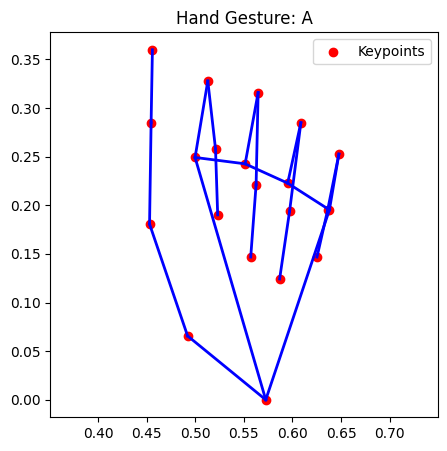

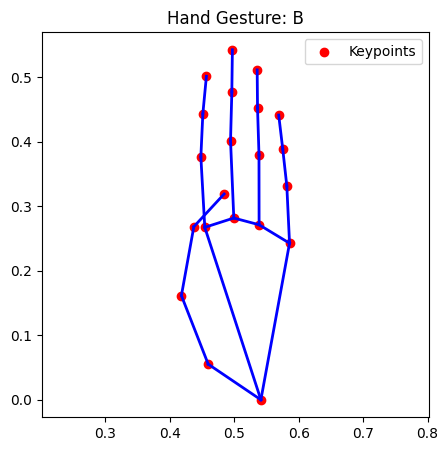

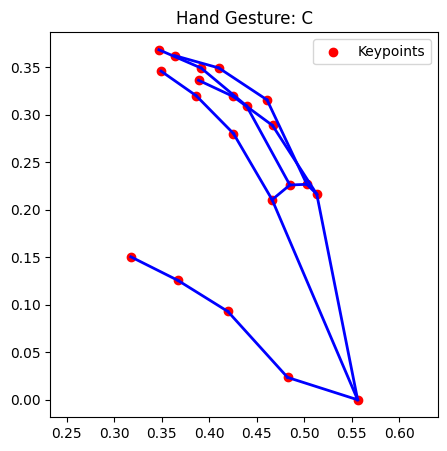

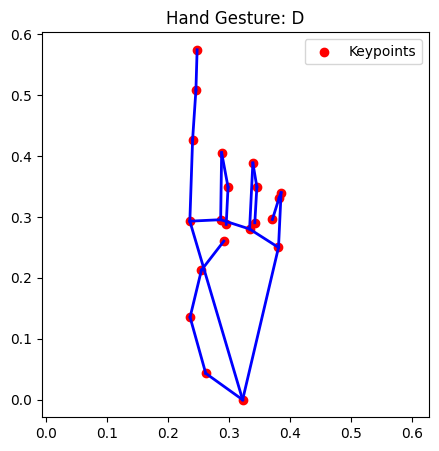

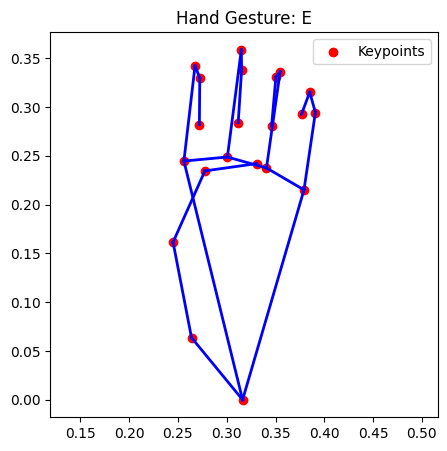

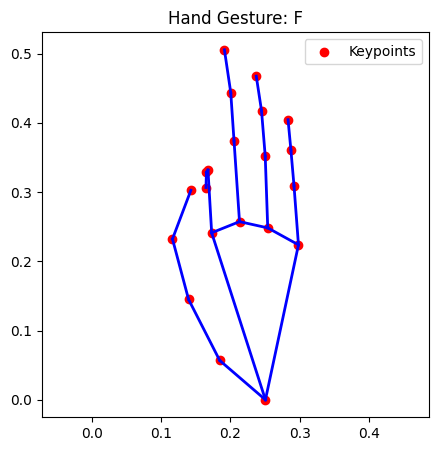

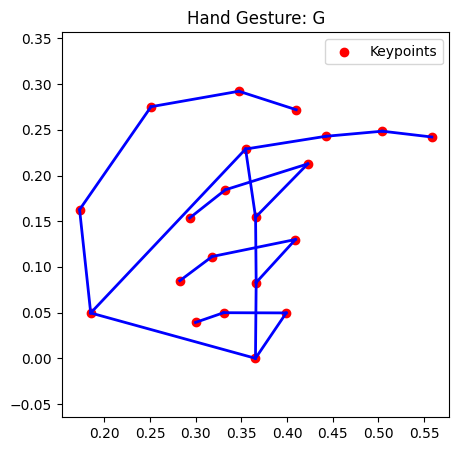

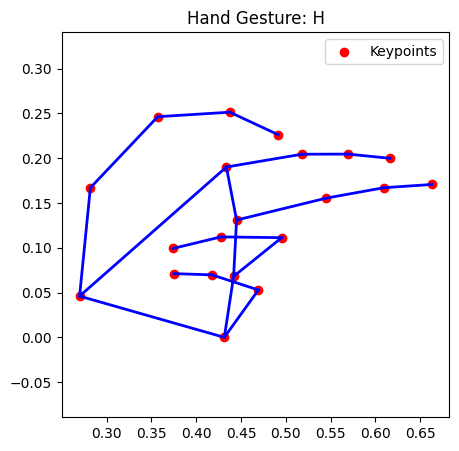

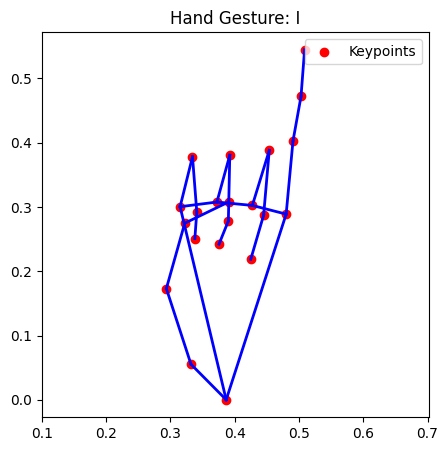

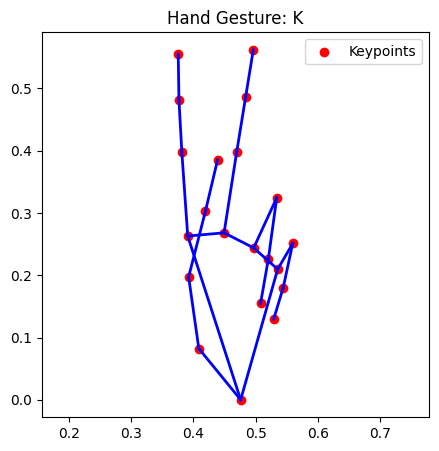

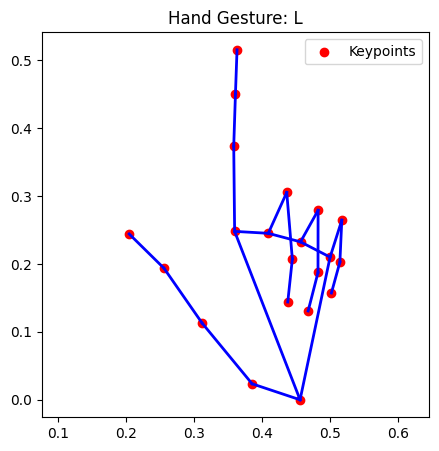

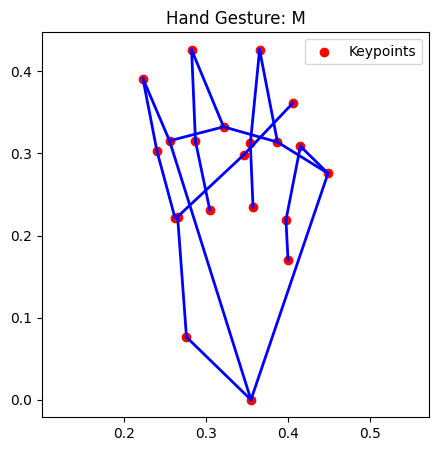

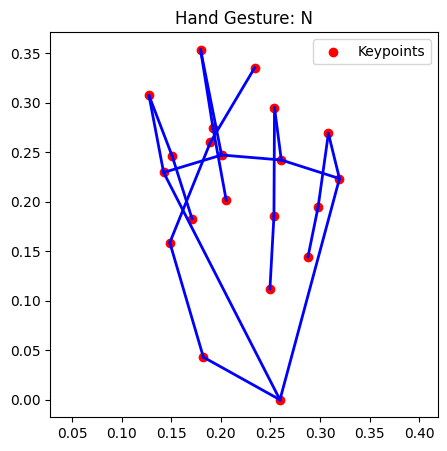

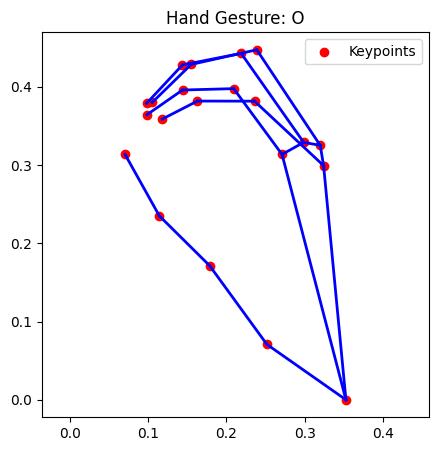

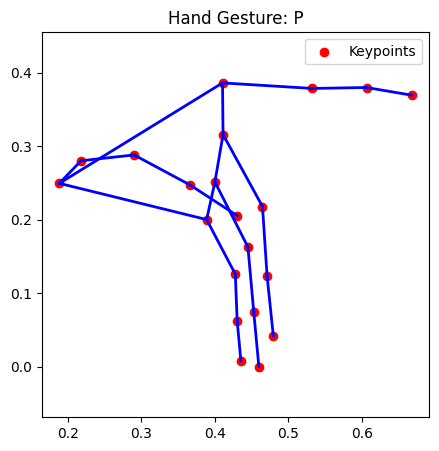

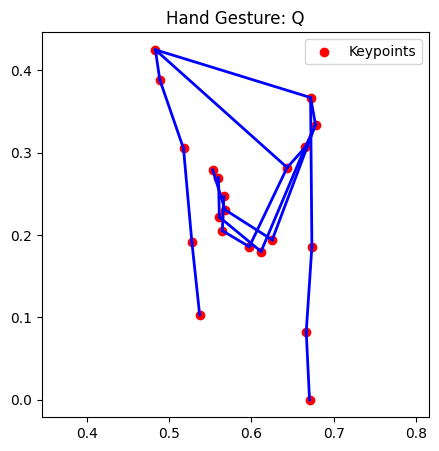

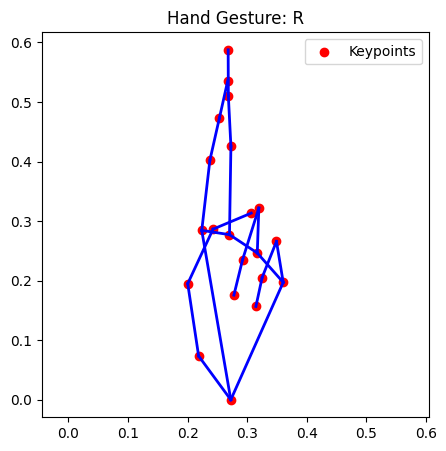

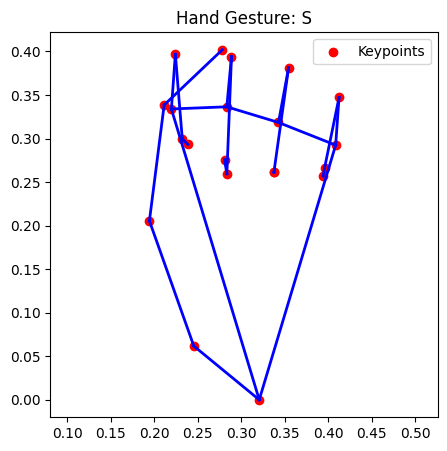

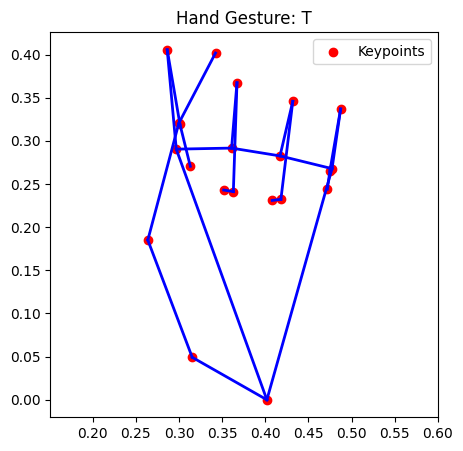

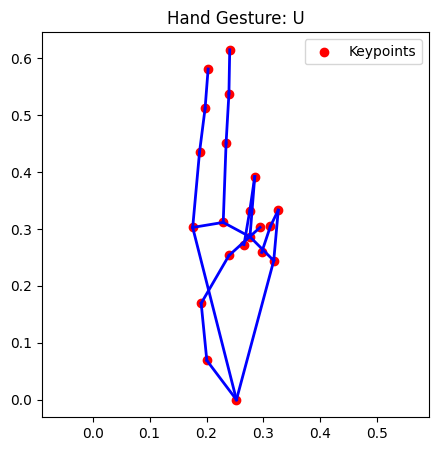

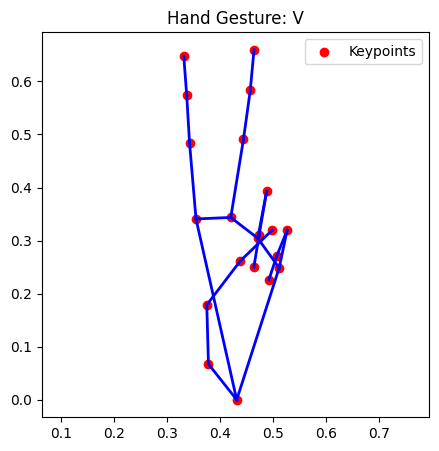

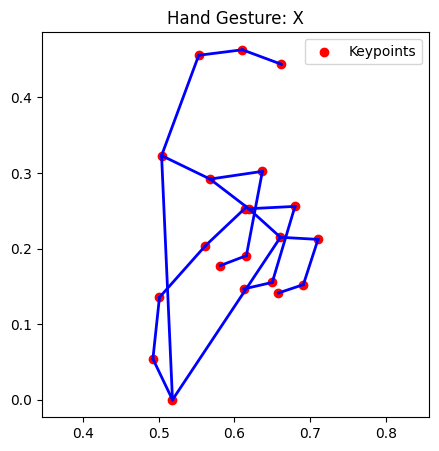

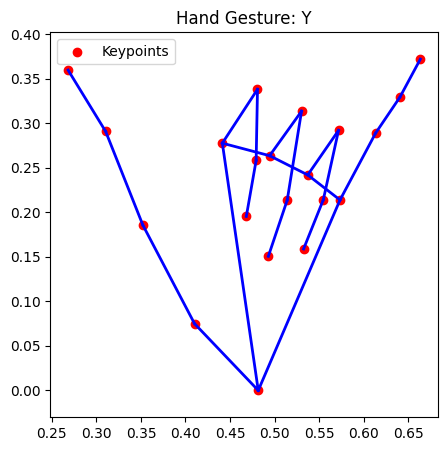

In [12]:
label_a_df = df[df['label'] == 'A']
plot_hand_gesture(label_a_df, 3)
label_b_df = df[df['label'] == 'B']
plot_hand_gesture(label_b_df, 9)
label_c_df = df[df['label'] == 'C']
plot_hand_gesture(label_c_df, 1)
label_d_df = df[df['label'] == 'D']
plot_hand_gesture(label_d_df, 3)
label_e_df = df[df['label'] == 'E']
plot_hand_gesture(label_e_df, 4)
label_f_df = df[df['label'] == 'F']
plot_hand_gesture(label_f_df, 5)
label_g_df = df[df['label'] == 'G']
plot_hand_gesture(label_g_df, 7)
label_h_df = df[df['label'] == 'H']
plot_hand_gesture(label_h_df, 8)
label_i_df = df[df['label'] == 'I']
plot_hand_gesture(label_i_df, 9)
label_k_df = df[df['label'] == 'K']
plot_hand_gesture(label_k_df, 0)
label_l_df = df[df['label'] == 'L']
plot_hand_gesture(label_l_df, 1)
label_m_df = df[df['label'] == 'M']
plot_hand_gesture(label_m_df, 2)
label_n_df = df[df['label'] == 'N']
plot_hand_gesture(label_n_df, 3)
label_o_df = df[df['label'] == 'O']
plot_hand_gesture(label_o_df, 5)
label_p_df = df[df['label'] == 'P']
plot_hand_gesture(label_p_df, 7)
label_q_df = df[df['label'] == 'Q']
plot_hand_gesture(label_q_df, 1)
label_r_df = df[df['label'] == 'R']
plot_hand_gesture(label_r_df, 9)
label_s_df = df[df['label'] == 'S']
plot_hand_gesture(label_s_df, 4)
label_t_df = df[df['label'] == 'T']
plot_hand_gesture(label_t_df, 5)
label_u_df = df[df['label'] == 'U']
plot_hand_gesture(label_u_df, 4)
label_v_df = df[df['label'] == 'V']
plot_hand_gesture(label_v_df, 6)
label_x_df = df[df['label'] == 'X']
plot_hand_gesture(label_x_df, 8)
label_y_df = df[df['label'] == 'Y']
plot_hand_gesture(label_y_df, 2)

In [13]:
# --- Check and Remove Duplicates --- # ADD THIS SECTION
num_duplicates = df.duplicated().sum()
print(f"Found {num_duplicates} duplicate rows.")
if num_duplicates > 0:
    print("Removing duplicate rows...")
    df.drop_duplicates(inplace=True) # inplace=True modifies the DataFrame directly
    print(f"Shape after removing duplicates: {df.shape}")
else:
    print("No duplicate rows to remove.")

Found 1824 duplicate rows.
Removing duplicate rows...
Shape after removing duplicates: (22155, 43)


In [14]:
# --- Separate Features (X) and Labels (y) ---
X = df.drop('label', axis=1).values
y_str = df['label'].values

print(f"\nFeatures (X) shape (post-deduplication): {X.shape}")
print(f"Labels (y_str) shape (post-deduplication): {y_str.shape}")
# ... (rest of Step 2 remains the same: create mappings, convert labels, split data, one-hot encode) ...


Features (X) shape (post-deduplication): (22155, 42)
Labels (y_str) shape (post-deduplication): (22155,)


In [15]:
# --- Create Numerical Label Mapping ---
unique_labels = sorted(np.unique(y_str))
num_classes = len(unique_labels)
label_to_int = {label: i for i, label in enumerate(unique_labels)}
int_to_label = {i: label for i, label in enumerate(unique_labels)}
print(f"\nFound {num_classes} unique classes: {unique_labels}")
print(f"Label to Integer mapping: {label_to_int}")


Found 24 unique classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
Label to Integer mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'O': 13, 'P': 14, 'Q': 15, 'R': 16, 'S': 17, 'T': 18, 'U': 19, 'V': 20, 'W': 21, 'X': 22, 'Y': 23}


In [16]:
# --- Save the Label Mapping ---
try:
    with open(LABEL_MAP_FILE, 'wb') as f:
        pickle.dump(int_to_label, f)
    print(f"Integer-to-Label mapping saved to {LABEL_MAP_FILE}")
except IOError as e:
    print(f"Warning: Could not save label map file: {e}")

Integer-to-Label mapping saved to label_map.pkl


In [17]:
# --- Convert String Labels to Numerical Labels ---
y = np.array([label_to_int[label] for label in y_str])
print(f"\nNumerical labels (y) shape: {y.shape}")



Numerical labels (y) shape: (22155,)


In [18]:
# --- Data Splitting ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)
print(f"\nData split:")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Testing samples:  {X_test.shape[0]}")


Data split:
  Training samples: 17724
  Testing samples:  4431


In [19]:
# --- One-Hot Encode Numerical Labels ---
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)
print(f"\nLabels after one-hot encoding:")
print(f"  y_train_cat shape: {y_train_cat.shape}")
print(f"  y_test_cat shape:  {y_test_cat.shape}")


Labels after one-hot encoding:
  y_train_cat shape: (17724, 24)
  y_test_cat shape:  (4431, 24)


Building The model

In [20]:
# Import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [21]:
# --- Model Configuration ---
INPUT_SHAPE = (X_train.shape[1],) # Number of features (e.g., 42)
NUM_CLASSES = num_classes         # Number of unique letters
MODEL_SAVE_PATH = 'sign_language_model.keras' # Use .keras format

In [22]:
# --- Build the Model ---
# A simple Multi-Layer Perceptron (MLP)
model = Sequential([
    Dense(128, activation='relu', input_shape=INPUT_SHAPE),
    Dropout(0.3), # Helps prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    # Output layer: NUM_CLASSES neurons, softmax for multi-class probability distribution
    Dense(NUM_CLASSES, activation='softmax')
])

In [23]:
# --- Compile the Model ---
model.compile(optimizer='adam',                       # Adam is a good general-purpose optimizer
              loss='categorical_crossentropy',      # Suitable for one-hot encoded labels
              metrics=['accuracy'])                 # Track accuracy during training

model.summary() # Print model architecture


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5504      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 24)                792       
                                                                 
Total params: 16632 (64.97 KB)
Trainable params: 16632 

In [24]:
# --- Callbacks for Training ---
# EarlyStopping: Stop training if validation loss doesn't improve for 'patience' epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# ReduceLROnPlateau: Reduce learning rate if validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [25]:
# --- Train the Model ---
EPOCHS = 100
BATCH_SIZE = 32

print("\nStarting model training...")
history = model.fit(
    X_train, y_train_cat,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2, # Use 20% of training data for validation during training
    callbacks=[early_stopping, reduce_lr],
    verbose=1 # Show progress bar
)

print("Model training finished.")


Starting model training...
Epoch 1/100


444/444 [==============================] - 2s 3ms/step - loss: 2.3853 - accuracy: 0.2442 - val_loss: 1.1684 - val_accuracy: 0.6869 - lr: 0.0010
Epoch 2/100
444/444 [==============================] - 1s 2ms/step - loss: 1.0599 - accuracy: 0.6110 - val_loss: 0.4921 - val_accuracy: 0.9021 - lr: 0.0010
Epoch 3/100
444/444 [==============================] - 1s 2ms/step - loss: 0.6331 - accuracy: 0.7709 - val_loss: 0.2223 - val_accuracy: 0.9774 - lr: 0.0010
Epoch 4/100
444/444 [==============================] - 1s 2ms/step - loss: 0.3976 - accuracy: 0.8625 - val_loss: 0.1258 - val_accuracy: 0.9630 - lr: 0.0010
Epoch 5/100
444/444 [==============================] - 1s 2ms/step - loss: 0.2822 - accuracy: 0.9015 - val_loss: 0.0894 - val_accuracy: 0.9822 - lr: 0.0010
Epoch 6/100
444/444 [==============================] - 1s 2ms/step - loss: 0.2170 - accuracy: 0.9239 - val_loss: 0.0651 - val_accuracy: 0.9763 - lr: 0.0010
Epoch 7/100
444/444 [=============

In [26]:
# --- Save the Trained Model ---
print(f"Attempting to save model to: {MODEL_SAVE_PATH}")
try:
    model.save(MODEL_SAVE_PATH)
    print(f"Model successfully saved to {MODEL_SAVE_PATH}")
except Exception as e:
    print(f"ERROR SAVING MODEL: {e}")

Attempting to save model to: sign_language_model.keras
Model successfully saved to sign_language_model.keras


In [27]:
WEIGHTS_SAVE_PATH = 'sign_language_weights.h5'
print(f"\n--- Step 3 Saving Weights ---")
try:
    model.save_weights(WEIGHTS_SAVE_PATH)
    print(f"Model weights successfully saved to {WEIGHTS_SAVE_PATH}")
    # Optional: Check file size/existence here if needed
except Exception as e:
    print(f"ERROR saving weights: {e}")


--- Step 3 Saving Weights ---
Model weights successfully saved to sign_language_weights.h5


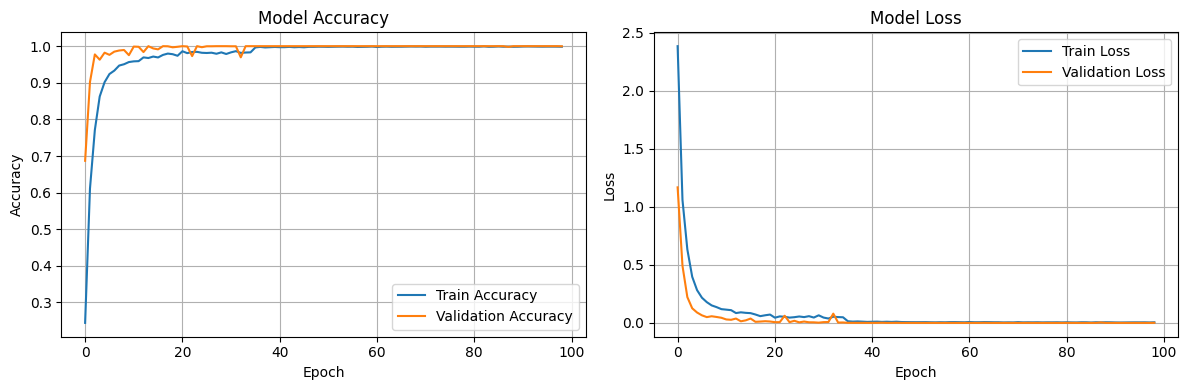

In [28]:
# --- Plot Training History ---
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_history(history)

Evaluate with pickle

In [29]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [30]:
print("--- Step 4: Evaluation ---")

# --- Configuration ---
# Define the file paths RIGHT HERE before they are used
MODEL_PATH = 'sign_language_model.keras'
LABEL_MAP_FILE = 'label_map.pkl'
print(f"Model path set to: {MODEL_PATH}")
print(f"Label map file path set to: {LABEL_MAP_FILE}")

--- Step 4: Evaluation ---
Model path set to: sign_language_model.keras
Label map file path set to: label_map.pkl


In [31]:
# --- Load Model ---
print("Loading Keras model...")
try:
    model = tf.keras.models.load_model(MODEL_PATH)
    print(f"Model loaded successfully from {MODEL_PATH}")
except Exception as e:
    print(f"FATAL ERROR loading model: {e}")
    exit() # Stop if model can't be loaded

Loading Keras model...
Model loaded successfully from sign_language_model.keras


In [32]:
# --- Load the INT -> LABEL mapping DIRECTLY ---
print(f"Loading label map from {LABEL_MAP_FILE}...")
try:
    # This line uses LABEL_MAP_FILE, which MUST be defined above
    with open(LABEL_MAP_FILE, 'rb') as f:
        int_to_label = pickle.load(f)
    # Get class names in the correct order
    class_names = [int_to_label[i] for i in range(len(int_to_label))]
    NUM_CLASSES = len(class_names)
    print(f"Label map loaded successfully. Classes ({NUM_CLASSES}): {class_names}")
except FileNotFoundError:
    # This line also uses LABEL_MAP_FILE
    print(f"FATAL ERROR: Label map file '{LABEL_MAP_FILE}' not found.")
    print("Please ensure 'label_map.pkl' exists in the same directory and Step 2 was run correctly.")
    exit() # Stop if the map file isn't found
except Exception as e:
     # This line also uses LABEL_MAP_FILE
     print(f"FATAL ERROR loading label map from {LABEL_MAP_FILE}: {e}")
     exit() # Stop on other loading errors

Loading label map from label_map.pkl...
Label map loaded successfully. Classes (24): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [33]:
# Note: X_test, y_test, y_test_cat should still be available from Step 2
# If running separately, reload and re-split the data as in Step 2

In [34]:
# --- Make Predictions on Test Data ---
predictions_proba = model.predict(X_test)

139/139 [==============================] - 0s 1ms/step


In [35]:
# Get the index of the highest probability class for each sample
predictions = np.argmax(predictions_proba, axis=1)

In [36]:
# y_test contains the original numerical labels (0, 1, 2...)
# We need these for comparison with predictions
y_test_indices = np.argmax(y_test_cat, axis=1) # Convert one-hot back to indices OR use y_test directly if available

In [37]:
# --- Calculate Accuracy ---
accuracy = accuracy_score(y_test_indices, predictions)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 100.00%


In [38]:
# --- Classification Report ---
# Shows precision, recall, f1-score for each class
print("\nClassification Report:")
report = classification_report(y_test_indices, predictions, target_names=class_names, zero_division=0)
print(report)


Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       189
           B       1.00      1.00      1.00       191
           C       1.00      1.00      1.00       195
           D       1.00      1.00      1.00       177
           E       1.00      1.00      1.00       179
           F       1.00      1.00      1.00       183
           G       1.00      1.00      1.00       187
           H       1.00      1.00      1.00       182
           I       1.00      1.00      1.00       185
           K       1.00      1.00      1.00       185
           L       1.00      1.00      1.00       182
           M       1.00      1.00      1.00       191
           N       1.00      1.00      1.00       178
           O       1.00      1.00      1.00       188
           P       1.00      1.00      1.00       190
           Q       1.00      1.00      1.00       185
           R       1.00      1.00      1.00       188
   

In [39]:
# --- Confusion Matrix ---
# Shows which classes are being confused with others
cm = confusion_matrix(y_test_indices, predictions)

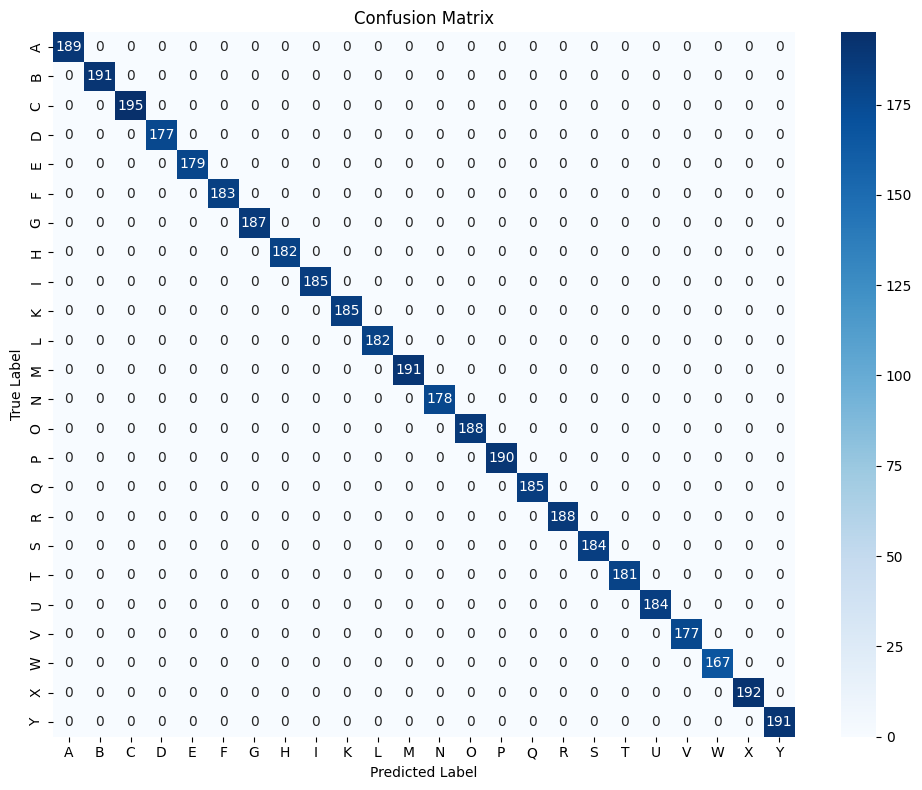

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()